In [29]:
import xarray as xr
from metpy.units import units
from metpy import calc as mpcalc
import matplotlib
import matplotlib.pyplot as plt
import math
import netCDF4
from netCDF4 import Dataset
from datetime import datetime as dt
from datetime import datetime, timedelta
from cftime import num2date, date2num
import cartopy.feature
from cartopy.util import add_cyclic_point
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [3]:
gh_ds = xr.open_dataset("/home11/grad/2021/gd673524/research/gdines/data/realtime/RT_ECMWF_gh.nc")
t_ds = xr.open_dataset("/home11/grad/2021/gd673524/research/gdines/data/realtime/RT_ECMWF_t.nc")
u_ds = xr.open_dataset("/home11/grad/2021/gd673524/research/gdines/data/realtime/RT_ECMWF_u.nc")
v_ds = xr.open_dataset("/home11/grad/2021/gd673524/research/gdines/data/realtime/RT_ECMWF_v.nc")
w_ds = xr.open_dataset("/home11/grad/2021/gd673524/research/gdines/data/realtime/RT_ECMWF_w.nc")

In [4]:
u_ds

<xarray.Dataset>
Dimensions:    (longitude: 240, latitude: 121, level: 10, number: 50, step: 47, date: 8)
Coordinates:
  * longitude  (longitude) float32 0.0 1.5 3.0 4.5 ... 354.0 355.5 357.0 358.5
  * latitude   (latitude) float32 90.0 88.5 87.0 85.5 ... -87.0 -88.5 -90.0
  * level      (level) int32 10 50 100 200 300 500 700 850 925 1000
  * number     (number) int32 1 2 3 4 5 6 7 8 9 ... 42 43 44 45 46 47 48 49 50
  * step       (step) timedelta64[ns] 0 days 1 days 2 days ... 45 days 46 days
  * date       (date) datetime64[ns] 2021-01-04 2021-01-07 ... 2021-01-28
Data variables:
    u          (date, step, number, level, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-02-23 23:53:34 GMT by grib_to_netcdf-2.20.0: grib_to_n...

In [5]:
#Creating Variables
lat = gh_ds.latitude
lon = gh_ds.longitude
level = gh_ds.level #<--Levels=[10,50,100,200,300,500,700,850,925,1000]
step = gh_ds.step
number = gh_ds.number
date = gh_ds.date

#These are variables at 1 location at 1 time for 1 ensemble and 1 height
z_1loc = gh_ds.variables['gh'][:,1,5,1,1,1]
t_1loc = t_ds.variables['t'][:,1,5,1,1,1]
u_1loc = u_ds.variables['u'][:,1,5,1,1,1]
v_1loc = v_ds.variables['v'][:,1,5,1,1,1]
w_1loc = w_ds.variables['w'][:,1,5,1,1,1]

In [6]:
z_1loc

<xarray.Variable (date: 8)>
array([19631.13 , 19944.871, 20165.984, 20278.035, 20275.047, 20315.883,
       20289.488, 19601.25 ], dtype=float32)
Attributes:
    units:          gpm
    long_name:      Geopotential Height
    standard_name:  geopotential_height

In [7]:
# Vertical level specificaton
vlevel = 500
levelStr = str(vlevel)

# Date/Time specification [Data set is every 24-hrs: 2001-01-25 to 2020-03-11]
Year = 2001
Month = 1
Day = 25
Hour = 0
Minute = 0
dateTime = dt(Year,Month,Day, Hour, Minute)
timeStr = dateTime.strftime("%Y-%m-%d %H%M UTC")

In [8]:
timeStr

'2001-01-25 0000 UTC'

In [9]:
#Calculating the Ensemble Means
z_ensmn = gh_ds.mean(dim='number')
t_ensmn = t_ds.mean(dim='number')

#for whatever reason, if I try to do this with the wind variables it crashes the kernel.

In [13]:
#Creating ensemble 500-hPa mean variables at one location (for Time series)
zens_1loc = z_ensmn.variables['gh'][1,:,5,1,1]
tens_1loc = t_ensmn.variables['t'][1,:,5,1,1]

In [ ]:
#Calculating total wind average at 1 point
#mn_wnd_1loc = (uens_1loc**2 + vens_1loc**2)**(1/2)
#u_ensmn_units = u_ensmn.pint.quantify(units="m/s")
#vens_units = vens_1loc * units('m/s')
#wind_mn_1loc = mpcalc.wind_speed(uens_1loc, vens_1loc)

In [20]:
t_ensmn

<xarray.Dataset>
Dimensions:    (longitude: 240, latitude: 121, level: 10, step: 47, date: 8)
Coordinates:
  * longitude  (longitude) float32 0.0 1.5 3.0 4.5 ... 354.0 355.5 357.0 358.5
  * latitude   (latitude) float32 90.0 88.5 87.0 85.5 ... -87.0 -88.5 -90.0
  * level      (level) int32 10 50 100 200 300 500 700 850 925 1000
  * step       (step) timedelta64[ns] 0 days 1 days 2 days ... 45 days 46 days
  * date       (date) datetime64[ns] 2021-01-04 2021-01-07 ... 2021-01-28
Data variables:
    t          (date, step, level, latitude, longitude) float32 250.5 ... 250.4

In [24]:
#Creating 500-hPa Ensemble Mean Vairables at one time
tens_time = t_ensmn.variables['t'][1,1,5,:,:]
zens_time = z_ensmn.variables['gh'][1,1,5,:,:]

In [25]:
tens_time

<xarray.Variable (latitude: 121, longitude: 240)>
array([[230.06914, 230.06914, 230.06914, ..., 230.06914, 230.06914,
        230.06914],
       [230.46312, 230.47665, 230.49063, ..., 230.42255, 230.43599,
        230.44972],
       [230.90123, 230.94942, 230.99681, ..., 230.75395, 230.80304,
        230.85236],
       ...,
       [235.89839, 235.93121, 235.96364, ..., 235.8081 , 235.8355 ,
        235.866  ],
       [235.83969, 235.84268, 235.84569, ..., 235.83351, 235.835  ,
        235.83699],
       [235.9495 , 235.9495 , 235.9495 , ..., 235.9495 , 235.9495 ,
        235.9495 ]], dtype=float32)

<Figure size 1080x864 with 0 Axes>

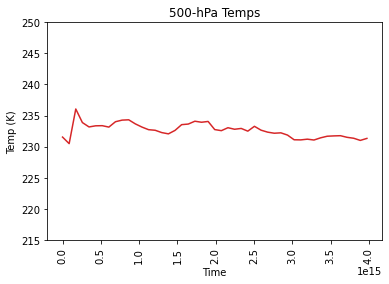

In [16]:
#Time Series plot for 500-hpa Temps for each ensemble at 1 location
fig = plt.figure(figsize=(15,12))
fig, ax = plt.subplots(1, 1)

ax.plot(step, tens_1loc, color='tab:red')
ax.set_title('500-hPa Temps')
ax.set_xlabel ('Time')
ax.set_ylabel ('Temp (K)')
ax.set_ylim(215,250)
ax.tick_params(axis='x', labelrotation = 90)

plt.show()

/tmp/ipykernel_15489/986766512.py:7: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.set_edgecolor('none')


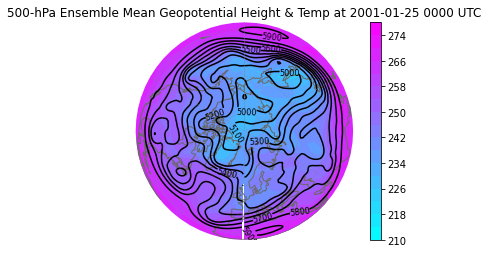

In [28]:
# Areal extent
plt.Figure(figsize=(18,18),dpi=120)    ## <---Set fig size here!

#Set plot as an orthographic projection looking down at the Earth from the pole with 0˚ at 6-oclock
ax = plt.axes(projection=ccrs.Orthographic(0,90))     
ax.add_feature(cartopy.feature.LAND, zorder=1, edgecolor='dimgray',facecolor='none')
ax.outline_patch.set_edgecolor('none')
gl = ax.gridlines(color="grey",linestyle=":",linewidth=0.5)  
glevs = range(4000,6000,100)  ## <---set contour interval for geo. heights
tlevs = range(210,280,4)        ## <--- set contour interval for temp
[x,y] = np.meshgrid(lon,lat)  ## <--- set lat/lon as coords on grid
        
plt.title(f"500-hPa Ensemble Mean Geopotential Height & Temp at {timeStr}")
hghtplot = ax.contour(x,y,zens_time,glevs,transform=ccrs.PlateCarree(),extend='both',colors='black', linewidth=1)
ax.clabel(hghtplot, inline=True, fmt="%.0f", fontsize=8)
tempplot = ax.contourf(x,y,tens_time,tlevs,transform=ccrs.PlateCarree(),cmap="cool")
plt.colorbar(tempplot)

plt.show()